In [47]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_parquet("./option_chain_data.parquet")

In [48]:
df # quick inspection of data

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,date,ticker,type
0,GOOG220617C00700000,2022-01-05 17:22:59+00:00,700.0,2121.21,2050.8,2066.0,-106.91992,-4.79864,1.0,205.0,9.810185,1.0,REGULAR,USD,2022-05-19,GOOG,Call
1,GOOG220617C00720000,2021-11-08 18:25:44+00:00,720.0,2277.80,2246.3,2265.0,0.00000,0.00000,20.0,108.0,0.000000,1.0,REGULAR,USD,2022-05-19,GOOG,Call
2,GOOG220617C00740000,2021-11-10 11:51:11+00:00,740.0,2013.89,2226.2,2242.1,0.00000,0.00000,2.0,112.0,17.746342,1.0,REGULAR,USD,2022-05-19,GOOG,Call
3,GOOG220617C00760000,2021-11-10 11:51:11+00:00,760.0,1974.24,2206.9,2222.1,0.00000,0.00000,44.0,95.0,15.505127,1.0,REGULAR,USD,2022-05-19,GOOG,Call
4,GOOG220617C00780000,2021-11-10 11:51:11+00:00,780.0,2088.11,2187.7,2204.0,0.00000,0.00000,2.0,121.0,14.298585,1.0,REGULAR,USD,2022-05-19,GOOG,Call
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,GOOG220617P03700000,2021-10-25 13:41:18+00:00,3700.0,970.50,860.8,873.1,0.00000,0.00000,1.0,2.0,0.000010,1.0,REGULAR,USD,2022-05-19,GOOG,Put
295,GOOG220617P04000000,2021-11-26 14:35:24+00:00,4000.0,1107.00,1054.4,1066.6,0.00000,0.00000,2.0,2.0,0.000010,1.0,REGULAR,USD,2022-05-19,GOOG,Put
296,GOOG220617P04100000,2022-01-03 16:12:59+00:00,4100.0,1206.20,1338.6,1354.0,0.00000,0.00000,40.0,45.0,0.000010,1.0,REGULAR,USD,2022-05-19,GOOG,Put
297,GOOG220617P04200000,2022-01-04 17:36:50+00:00,4200.0,1308.31,1439.0,1454.9,0.00000,0.00000,6.0,42.0,0.000010,1.0,REGULAR,USD,2022-05-19,GOOG,Put


In [4]:
df.columns 

Index(['contractSymbol', 'lastTradeDate', 'strike', 'lastPrice', 'bid', 'ask',
       'change', 'percentChange', 'volume', 'openInterest',
       'impliedVolatility', 'inTheMoney', 'contractSize', 'currency', 'date',
       'ticker', 'type'],
      dtype='object')

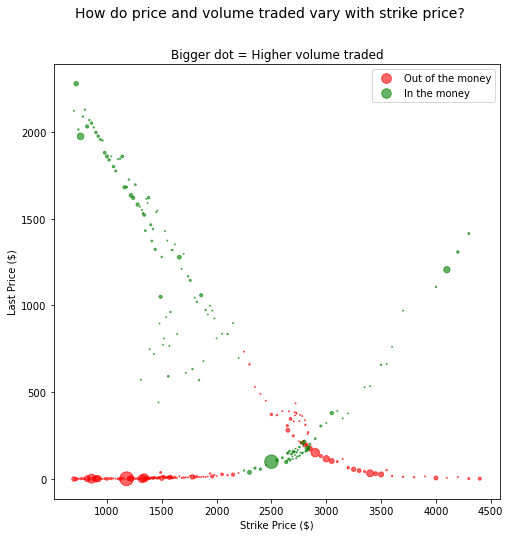

In [81]:
x_out = df.strike[df.inTheMoney.values == 0]
y_out = df.lastPrice[df.inTheMoney.values == 0]
s_out = df.volume[df.inTheMoney.values == 0]

x_in = df.strike[df.inTheMoney.values == 1]
y_in = df.lastPrice[df.inTheMoney.values == 1]
s_in = df.volume[df.inTheMoney.values == 1]

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x=x_out,y=y_out,s=s_out,alpha=0.6,c="red",label = "Out of the money")
ax.scatter(x=x_in,y=y_in,s=s_in,alpha=0.6,c="green",label = "In the money")
ax.set_xlabel("Strike Price ($)")
ax.set_ylabel("Last Price ($)")
plt.suptitle("How do price and volume traded vary with strike price?",fontsize=14)
ax.set_title("Bigger dot = Higher volume traded")

ax.legend()

plt.show()